
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [ ]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [ ]:

import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย','ลาว','กัมพูชา','เวียดนาม','เมียนมาร์','อินโดนีเซีย','ฟิลิปปินส์','มาเลเซีย','สิงคโปร์','ติมอร์-เลสเต','บรูไน'],
    'ประชากร (ล้าน)': [69.8,7.1,16.5,97.3,55.1,285.7,117.7,36.0,5.9,1.4,0.47],
    'พื้นที่ (ตร.กม.)': [513120,236800,181035,331210,676578,1904569,300000,330803,734,14874,5765]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)



          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0            ไทย           69.80            513120
1            ลาว            7.10            236800
2        กัมพูชา           16.50            181035
3       เวียดนาม           97.30            331210
4      เมียนมาร์           55.10            676578
5    อินโดนีเซีย          285.70           1904569
6     ฟิลิปปินส์          117.70            300000
7       มาเลเซีย           36.00            330803
8       สิงคโปร์            5.90               734
9   ติมอร์-เลสเต            1.40             14874
10         บรูไน            0.47              5765
          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  \
0            ไทย           69.80            513120   
1            ลาว            7.10            236800   
2        กัมพูชา           16.50            181035   
3       เวียดนาม           97.30            331210   
4      เมียนมาร์           55.10            676578   
5    อินโดนีเซีย          285.70           1904569   
6     ฟิลิ


### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

*ตอบ*

>เป็นข้อมูลสถิติจำนวนนักท่องเที่ยวและรายได้ในแต่ละปีของจังหวัดภูเก็ต



## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

  adm1_pcode       province    total     male   female  household  \
0       TH37  Amnat Charoen   378438   188632   189806     117994   
1       TH15      Ang Thong   279654   134095   145559      99928   
2       TH10        Bangkok  5666264  2669316  2996948    3041115   
3       TH38      Bueng Kan   424091   212859   211232     135143   
4       TH31       Buri Ram  1595747   793262   802485     468483   

                                            geometry  
0  MULTIPOLYGON (((104.95982 16.28359, 104.95986 ...  
1  MULTIPOLYGON (((100.33319 14.79853, 100.33341 ...  
2  MULTIPOLYGON (((100.61389 13.95462, 100.61428 ...  
3  MULTIPOLYGON (((103.40496 18.44898, 103.40619 ...  
4  MULTIPOLYGON (((102.93029 15.79514, 102.93029 ...  
EPSG:4326
Index(['adm1_pcode', 'province', 'total', 'male', 'female', 'household',
       'geometry'],
      dtype='object')


<Axes: >

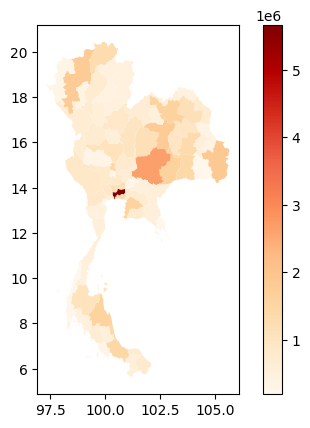

In [ ]:
import geopandas as gpd

# อ่านไฟล์ Shapefile และระบุเลเยอร์ที่ต้องการ
shapefile_path = '/content/drive/MyDrive/Basic_Program/populationthailand.gpkg'
geo_data = gpd.read_file(shapefile_path)

print(geo_data.head())
print(geo_data.crs)
print(geo_data.columns)


geo_data.plot(column='total', cmap='OrRd', legend=True)


## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

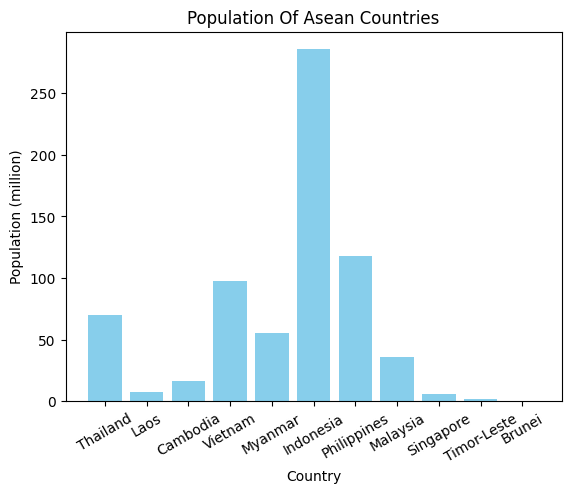

In [ ]:

import matplotlib.pyplot as plt
data = {
    'country': ['Thailand','Laos','Cambodia','Vietnam','Myanmar','Indonesia','Philippines','Malaysia','Singapore','Timor-Leste','Brunei'],
    'population (million)': [69.8,7.1,16.5,97.3,55.1,285.7,117.7,36.0,5.9,1.4,0.47],
    'area (sqkm)': [513120,236800,181035,331210,676578,1904569,300000,330803,734,14874,5765]
}
df = pd.DataFrame(data)

# สร้างกราฟแสดงประชากร
plt.bar(df['country'], df['population (million)'], color='skyblue')
plt.title('Population Of Asean Countries')
plt.xlabel('Country')
plt.ylabel('Population (million)')
import pandas as pd
import matplotlib.pyplot as plt
plt.xticks(rotation=30)
plt.show()



### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

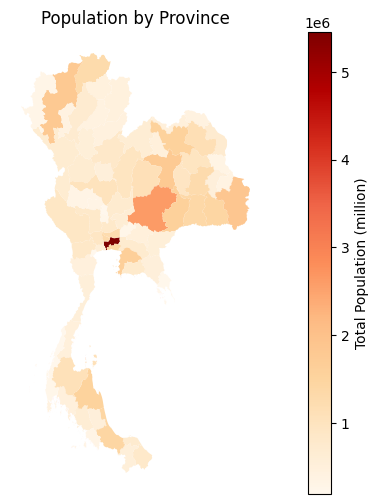

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. โหลดข้อมูล Shapefile (ไฟล์ .shp)
geo_data = gpd.read_file('/content/drive/MyDrive/Basic_Program/tambon_dissolve_fol')

# 2. โหลดข้อมูลประชากร
df = pd.read_csv('/content/drive/MyDrive/Basic_Program/stat_c2567.csv')

# 3. รวมข้อมูล (Merging)
# ตรวจสอบให้แน่ใจว่าค่าในคอลัมน์ที่ใช้ Join กันนั้นเหมือนกันทุกตัวอักษร
merged_data = geo_data.merge(df, left_on='adm1_name1', right_on='ชื่อ')

if 'จำนวนประชากรทั้งหมด' in merged_data.columns:
    # ลบเครื่องหมายจุลภาคออกก่อนแปลงเป็นตัวเลข
    merged_data['จำนวนประชากรทั้งหมด'] = merged_data['จำนวนประชากรทั้งหมด'].astype(str).str.replace(',', '', regex=False)
    # แปลงเป็น int (หรือ float หากมีทศนิยม)
    merged_data['จำนวนประชากรทั้งหมด'] = pd.to_numeric(merged_data['จำนวนประชากรทั้งหมด'], errors='coerce').fillna(0).astype(int)


# 4. แสดงผล
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
merged_data.plot(column='จำนวนประชากรทั้งหมด',
                 cmap='OrRd',
                 legend=True,
                 ax=ax,
                 legend_kwds={'label': "Total Population (million)",
                                      'orientation': "vertical"})



plt.title('Population by Province')
plt.axis('off')
plt.show()


## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

In [41]:
# ข้อ1 ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
import pandas as pd

data = {
    'ประเทศ': ['ไทย','ลาว','กัมพูชา','เวียดนาม','เมียนมาร์','อินโดนีเซีย','ฟิลิปปินส์','มาเลเซีย','สิงคโปร์','ติมอร์-เลสเต','บรูไน'],
    'ประชากร (ล้าน)': [69.8,7.1,16.5,97.3,55.1,285.7,117.7,36.0,5.9,1.4,0.47],
    'พื้นที่ (ตร.กม.)': [513120,236800,181035,331210,676578,1904569,300000,330803,734,14874,5765]
}
df = pd.DataFrame(data)

print(df)

df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)

          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0            ไทย           69.80            513120
1            ลาว            7.10            236800
2        กัมพูชา           16.50            181035
3       เวียดนาม           97.30            331210
4      เมียนมาร์           55.10            676578
5    อินโดนีเซีย          285.70           1904569
6     ฟิลิปปินส์          117.70            300000
7       มาเลเซีย           36.00            330803
8       สิงคโปร์            5.90               734
9   ติมอร์-เลสเต            1.40             14874
10         บรูไน            0.47              5765
          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  \
0            ไทย           69.80            513120   
1            ลาว            7.10            236800   
2        กัมพูชา           16.50            181035   
3       เวียดนาม           97.30            331210   
4      เมียนมาร์           55.10            676578   
5    อินโดนีเซีย          285.70           1904569   
6     ฟิลิ

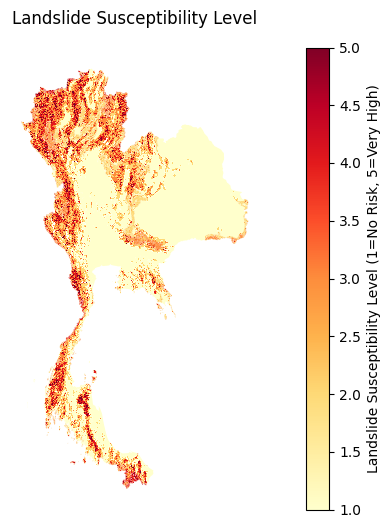

In [18]:
# ข้อ2 นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

shapefile_path = '/content/drive/MyDrive/Basic_Program/landslide/landsld.shp'

geo_landslide_data = gpd.read_file(shapefile_path)

# Define a mapping for risk levels to numerical values
risk_mapping = {
    'No Risk': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Very High': 5
}

# Create a new numerical column 'risk_rank' by mapping 'Level_E'
# Values in 'Level_E' not found in risk_mapping will result in NaN, which matplotlib can handle.
geo_landslide_data['risk_rank'] = geo_landslide_data['Level_E'].map(risk_mapping)


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
geo_landslide_data.plot(column='risk_rank',
                         cmap='YlOrRd',
                         legend=True,
                         ax=ax,
                         edgecolor=None,
                         linewidth=0.5,
                         legend_kwds={'label': "Landslide Susceptibility Level (1=No Risk, 5=Very High)",
                                      'orientation': "vertical"})

plt.title('Landslide Susceptibility Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()

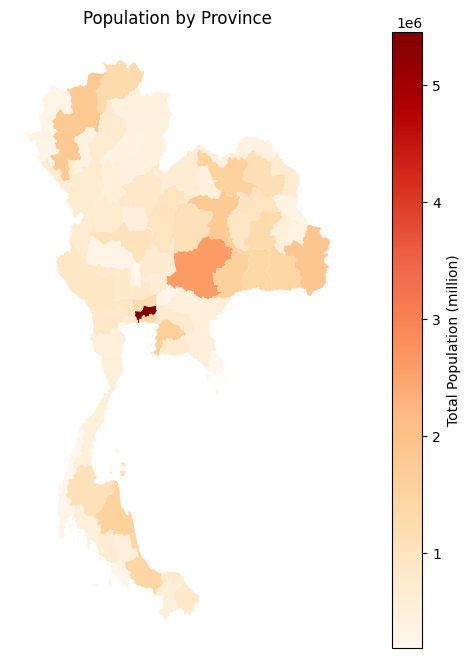

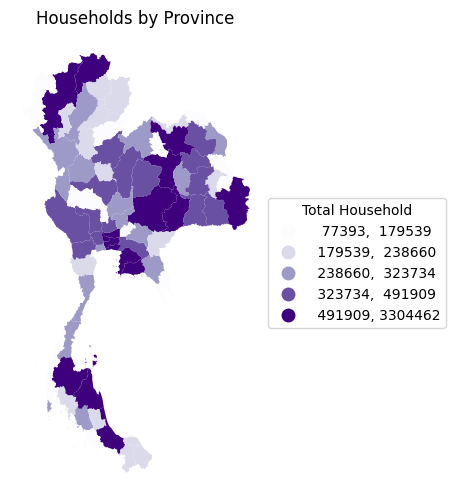

In [39]:
# ข้อ3 ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น area หรือ density (5 คะแนน)
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. โหลดข้อมูล Shapefile (ไฟล์ .shp)
geo_data = gpd.read_file('/content/drive/MyDrive/Basic_Program/tambon_dissolve_fol')

# 2. โหลดข้อมูลประชากร
df = pd.read_csv('/content/drive/MyDrive/Basic_Program/stat_c2567.csv')

# 3. รวมข้อมูล (Merging)
# ตรวจสอบให้แน่ใจว่าค่าในคอลัมน์ที่ใช้ Join กันนั้นเหมือนกันทุกตัวอักษร
merged_data = geo_data.merge(df, left_on='adm1_name1', right_on='ชื่อ')

if 'จำนวนประชากรทั้งหมด' in merged_data.columns:
    # ลบเครื่องหมายจุลภาคออกก่อนแปลงเป็นตัวเลข
    merged_data['จำนวนประชากรทั้งหมด'] = merged_data['จำนวนประชากรทั้งหมด'].astype(str).str.replace(',', '', regex=False)
    # แปลงเป็น int (หรือ float หากมีทศนิยม)
    merged_data['จำนวนประชากรทั้งหมด'] = pd.to_numeric(merged_data['จำนวนประชากรทั้งหมด'], errors='coerce').fillna(0).astype(int)

# เพิ่มการทำความสะอาดและแปลงข้อมูลสำหรับคอลัมน์ 'จำนวนบ้าน (หลังคาเรือน)'
if 'จำนวนบ้าน (หลังคาเรือน)' in merged_data.columns:
    merged_data['จำนวนบ้าน (หลังคาเรือน)'] = merged_data['จำนวนบ้าน (หลังคาเรือน)'].astype(str).str.replace(',', '', regex=False)
    merged_data['จำนวนบ้าน (หลังคาเรือน)'] = pd.to_numeric(merged_data['จำนวนบ้าน (หลังคาเรือน)'], errors='coerce').fillna(0).astype(int)


# 4. แสดงผล แผนที่ประชากร
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='จำนวนประชากรทั้งหมด',
                 cmap='OrRd',
                 legend=True,
                 ax=ax,
                 legend_kwds={'label': "Total Population (million)",
                                      'orientation': "vertical"})


plt.title('Population by Province')
plt.axis('off')
plt.show()

print('')

# 5. แสดงผล แผนที่จำนวนบ้าน โดยแบ่งช่วงชั้นใน legend
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
merged_data.plot(column='จำนวนบ้าน (หลังคาเรือน)',
                 cmap='Purples',
                 legend=True,
                 ax=ax,
                 scheme='quantiles', # ใช้การแบ่งช่วงชั้นแบบ quantiles
                 k=5, # แบ่งออกเป็น 5 ช่วงชั้น
                 legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'fmt': '{:.0f}', 'title': "Total Household"})


plt.title('Households by Province') # Changed title for clarity
plt.axis('off')
plt.show()

**แหล่งที่มาของข้อมูล**

ศูนย์กลางข้อมูลเปิดภาครัฐ. (2564).พื้นที่มีโอกาสเกิดแผ่นดินถล่ม (Shapfile).
https://data.go.th/dataset/gdpublish-landslide_susceptibility


สำนักงานสถิติแห่งชาติ. (2567).จำนวนประชากรจากการทะเบียน ชาย หญิง เนื้อที่ ความหนาแน่น และบ้าน จำแนกเป็นรายภาค และจังหวัด พ.ศ.2555-2567. https://www.nso.go.th/nsoweb/downloadFile/stat_impt/i7/file_xls_th



**จัดทำโดย** น.ส. ลีนา บินอาฮาหมัด 6706615173